In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [97]:
df=pd.read_csv('Mexico_limpio.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/35797,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,Dici,2010-06-28,a few days or more,0%,f,...,5.00,5.00,5.00,4.80,4.70,1.0,1.0,0.0,0.0,1.70
1,https://www.airbnb.com/rooms/44616,Condesa Haus,A new concept of hosting in mexico through a b...,No se proporcionan detalles,https://a0.muscache.com/pictures/251410/ec75fe...,Fernando,2010-08-09,within an hour,100%,t,...,4.70,4.87,4.78,4.98,4.48,8.0,4.0,1.0,0.0,0.41
2,https://www.airbnb.com/rooms/67703,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No se proporcionan detalles,https://a0.muscache.com/pictures/3281720/6f078...,Nicholas,2011-01-04,within an hour,71%,t,...,4.75,4.94,4.92,4.98,4.91,2.0,2.0,0.0,0.0,0.31
3,https://www.airbnb.com/rooms/70644,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,Trisha,2010-08-24,within a few hours,100%,t,...,4.96,4.96,4.98,4.96,4.92,3.0,2.0,1.0,0.0,0.83
4,https://www.airbnb.com/rooms/107078,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,Andrea,2011-04-27,within an hour,100%,t,...,5.00,5.00,4.73,4.91,4.82,3.0,3.0,0.0,0.0,0.11


In [98]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,0%,f,t,Entire villa,Entire home/apt,f,2.0,1.0,1093.1,5.00
1,100%,t,t,Entire home,Entire home/apt,f,2.9,1.0,1511.6,4.70
2,71%,t,t,Entire rental unit,Entire home/apt,f,4.0,1.0,2029.0,4.75
3,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,1140.0,4.96
4,100%,t,t,Entire loft,Entire home/apt,f,2.0,1.5,1093.1,5.00
...,...,...,...,...,...,...,...,...,...,...
26577,100%,t,t,Private room in guesthouse,Private room,t,4.0,1.0,488.0,5.00
26578,100%,f,t,Room in hotel,Private room,t,2.0,1.0,1093.1,5.00
26579,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2700.0,5.00
26580,100%,f,t,Room in hotel,Private room,t,2.0,1.0,2600.0,5.00


In [99]:
#convertimos string a tipos numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
f1['property_type'] = encoder.fit_transform(f1['property_type'])

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

C:\Users\MaFer\AppData\Local\Temp\ipykernel_3656\3436113170.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_3656\3436113170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\MaFer\AppData\Local\Temp\ipykernel_3656\3436113170.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed

In [100]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]
#f3 = Private room
f3= f1[(f1["room_type"] == 2)]
#f4 = Shared room
f4= f1[(f1["room_type"] == 3)]
#f5 = Hotel room
f5= f1[(f1["room_type"] == 4)]

<Axes: xlabel='room_type', ylabel='price'>

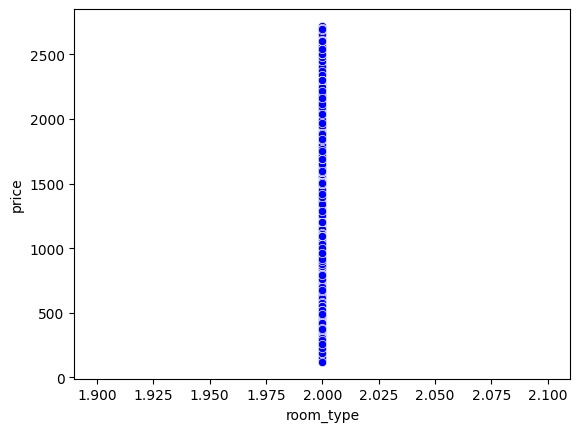

In [101]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='room_type',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_response_rate', ylabel='price'>

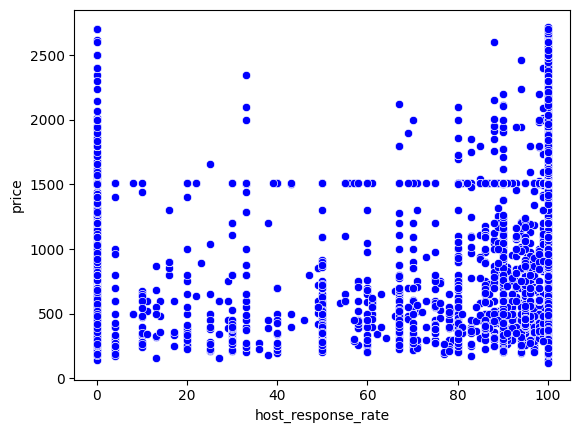

In [102]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_response_rate',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

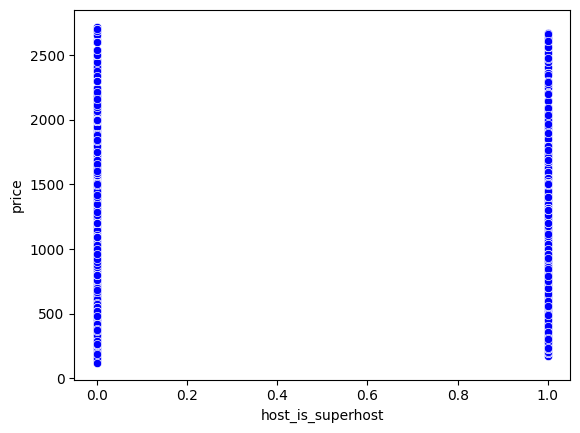

In [103]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

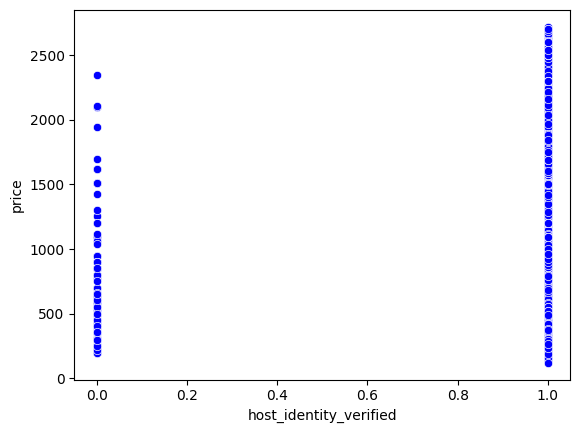

In [104]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

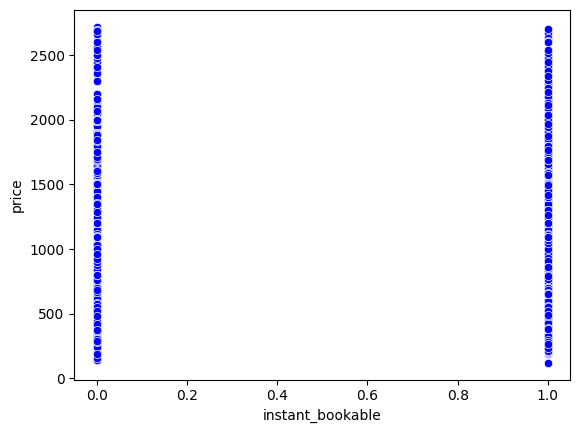

In [105]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

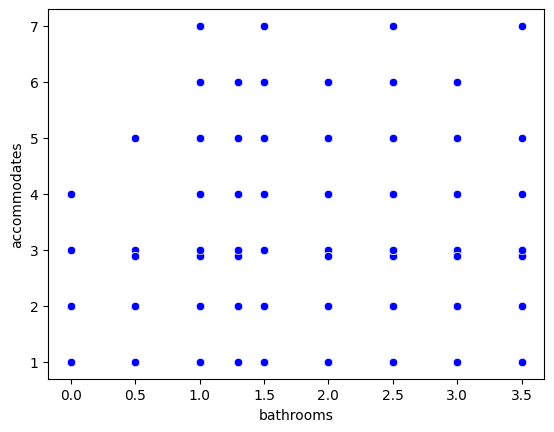

In [106]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms',y='accommodates', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

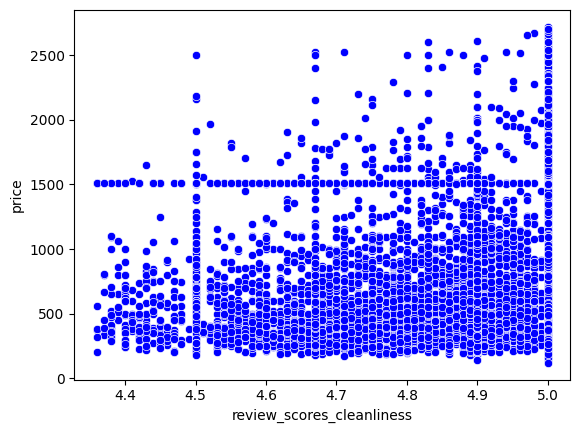

In [107]:
#imprimimos el scatter plot entre la variable dependiente (price) e indpendiente (room_type)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='review_scores_cleanliness',y='price', color="blue", data=f3)
#sns.scatterplot(x='property_type',y='price', color="red", data=f2)


In [108]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= f3 [['room_type']]
Vars_Dep= f3 ['price']

In [109]:
Vars_Indep2= f3 [['host_response_rate']]
Vars_Dep2= f3 ['price']

In [110]:
Vars_Indep3= f3 [['host_is_superhost']]
Vars_Dep3= f3 ['price']

In [111]:
Vars_Indep4= f3 [['host_identity_verified']]
Vars_Dep4= f3 ['price']

In [112]:
Vars_Indep5= f3 [['instant_bookable']]
Vars_Dep5= f3 ['price']

In [113]:
Vars_Indep6= f3 [['bathrooms']]
Vars_Dep6= f3 ['accommodates']

In [114]:
Vars_Indep7= f3 [['review_scores_cleanliness']]
Vars_Dep7= f3 ['price']

In [115]:
Vars_Indep8= f3 [['property_type']]
Vars_Dep8= f3 ['price']

In [116]:
#Se definie model (para room_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [117]:
#Se definie model (para host_response_rate) como función regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()

In [118]:
#Se definie model (para host_is_superhost) como función regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [119]:
#Se definie model (para host_identity_verified) como función regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [120]:
#Se definie model (para instant_bookable) como función regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [121]:
#Se definie model (para bathrooms) como función regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [122]:
#Se definie model (para review_scores_cleanliness) como función regresión lineal
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [123]:
#Se definie model (para property_type) como función regresión lineal
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [124]:
#Verficamos la función relacionada al modela
type(model)

sklearn.linear_model._base.LinearRegression

In [125]:
#Verficamos la función relacionada al modela
type(model2)

sklearn.linear_model._base.LinearRegression

In [126]:
#Verficamos la función relacionada al modela
type(model3)

sklearn.linear_model._base.LinearRegression

In [127]:
#Verficamos la función relacionada al modela
type(model4)

sklearn.linear_model._base.LinearRegression

In [128]:
#Verficamos la función relacionada al modela
type(model5)

sklearn.linear_model._base.LinearRegression

In [129]:
#Verficamos la función relacionada al modela
type(model6)

sklearn.linear_model._base.LinearRegression

In [130]:
#Verficamos la función relacionada al modela
type(model7)

sklearn.linear_model._base.LinearRegression

In [131]:
#Verficamos la función relacionada al modela
type(model8)

sklearn.linear_model._base.LinearRegression

In [132]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [133]:
#Ajustamos el modelo con las variables antes declaradas
model2.fit(X=Vars_Indep2, y=Vars_Dep2)

LinearRegression()

In [134]:
#Ajustamos el modelo con las variables antes declaradas
model3.fit(X=Vars_Indep3, y=Vars_Dep3)

LinearRegression()

In [135]:
#Ajustamos el modelo con las variables antes declaradas
model4.fit(X=Vars_Indep4, y=Vars_Dep4)

LinearRegression()

In [136]:
#Ajustamos el modelo con las variables antes declaradas
model5.fit(X=Vars_Indep5, y=Vars_Dep5)

LinearRegression()

In [137]:
#Ajustamos el modelo con las variables antes declaradas
model6.fit(X=Vars_Indep6, y=Vars_Dep6)

LinearRegression()

In [138]:
#Ajustamos el modelo con las variables antes declaradas
model7.fit(X=Vars_Indep7, y=Vars_Dep7)

LinearRegression()

In [139]:
#Ajustamos el modelo con las variables antes declaradas
model8.fit(X=Vars_Indep8, y=Vars_Dep8)

LinearRegression()

In [140]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(811.6864258598873)}

In [141]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-2.88499327]),
 'rank_': 1,
 'singular_': array([3935.02655172]),
 'intercept_': np.float64(1019.3999678770705)}

In [142]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-125.94390558]),
 'rank_': 1,
 'singular_': array([41.92558581]),
 'intercept_': np.float64(847.1239955178472)}

In [143]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-635.75587412]),
 'rank_': 1,
 'singular_': array([23.85192443]),
 'intercept_': np.float64(1402.6841503268051)}

In [144]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([66.70173871]),
 'rank_': 1,
 'singular_': array([43.86528376]),
 'intercept_': np.float64(789.6264352011002)}

In [145]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.15942032]),
 'rank_': 1,
 'singular_': array([37.09847383]),
 'intercept_': np.float64(1.7491727928127403)}

In [146]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([636.54968667]),
 'rank_': 1,
 'singular_': array([14.61294383]),
 'intercept_': np.float64(-2291.2776474326)}

In [147]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7.55857994]),
 'rank_': 1,
 'singular_': array([849.64482764]),
 'intercept_': np.float64(451.1265986027852)}

Modelo matemático: y= 0.0 + 125.132 <- Este caso especiífico es de room_type

In [148]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred= model.predict(X=f3[['room_type']])
y_pred

array([811.68642586, 811.68642586, 811.68642586, ..., 811.68642586,
       811.68642586, 811.68642586], shape=(8693,))

In [149]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred2= model2.predict(X=f3[['host_response_rate']])
y_pred2

array([1019.39996788,  730.90064041,  730.90064041, ...,  730.90064041,
        730.90064041,  730.90064041], shape=(8693,))

In [150]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred3= model3.predict(X=f3[['host_is_superhost']])
y_pred3

array([847.12399552, 721.18008994, 721.18008994, ..., 847.12399552,
       847.12399552, 847.12399552], shape=(8693,))

In [151]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred4= model4.predict(X=f3[['host_identity_verified']])
y_pred4

array([1402.68415033,  766.9282762 ,  766.9282762 , ...,  766.9282762 ,
        766.9282762 ,  766.9282762 ], shape=(8693,))

In [152]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred5= model5.predict(X=f3[['instant_bookable']])
y_pred5

array([789.6264352 , 789.6264352 , 789.6264352 , ..., 856.32817391,
       856.32817391, 856.32817391], shape=(8693,))

In [153]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred6= model6.predict(X=f3[['bathrooms']])
y_pred6

array([1.90859312, 1.90859312, 1.98830328, ..., 1.90859312, 1.90859312,
       1.90859312], shape=(8693,))

In [154]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred7= model7.predict(X=f3[['review_scores_cleanliness']])
y_pred7

array([891.47078593, 643.21640813, 840.546811  , ..., 891.47078593,
       891.47078593, 891.47078593], shape=(8693,))

In [155]:
#Predecimos los valores de total de accidentes a partir de la variable "alcohol"
#y_pread= model.predict(X=df[['alcohol','speeding']])
y_pred8= model8.predict(X=f3[['property_type']])
y_pred8

array([655.208257  , 851.73133546, 783.704116  , ..., 965.11003457,
       965.11003457, 965.11003457], shape=(8693,))

In [156]:
# Crear una copia de f3 antes de modificarlo
f3_copy = f3.copy()

In [157]:
#Insertamos la columna de predicciones en el Dataframe
f3.insert(0, 'Pred_room', y_pred)
f3

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
5,811.686426,0.0,0,0,27,2,0,2.0,1.0,1511.6,5.00
7,811.686426,100.0,1,1,53,2,0,2.0,1.0,335.0,4.61
10,811.686426,100.0,1,1,44,2,0,1.0,1.5,384.0,4.92
11,811.686426,0.0,0,0,35,2,0,1.0,1.0,947.0,4.97
12,811.686426,100.0,0,1,42,2,0,2.0,1.0,1200.0,4.97
...,...,...,...,...,...,...,...,...,...,...,...
26576,811.686426,0.0,0,1,44,2,1,2.0,2.0,262.0,5.00
26577,811.686426,100.0,1,1,43,2,1,4.0,1.0,488.0,5.00
26578,811.686426,100.0,0,1,68,2,1,2.0,1.0,1093.1,5.00
26579,811.686426,100.0,0,1,68,2,1,2.0,1.0,2700.0,5.00


In [158]:
# Insertamos las columnas de predicciones en la copia
f3_copy.insert(0, 'Pred_response', y_pred2)
f3_copy.insert(0, 'Pred_superhost', y_pred3)
f3_copy.insert(0, 'Pred_identity', y_pred4)
f3_copy.insert(0, 'Pred_bookable', y_pred5)
f3_copy.insert(0, 'Pred_bathrooms', y_pred6)
f3_copy.insert(0, 'Pred_cleanliness', y_pred7)
f3_copy.insert(0, 'Pred_property', y_pred8)

<Axes: xlabel='room_type', ylabel='price'>

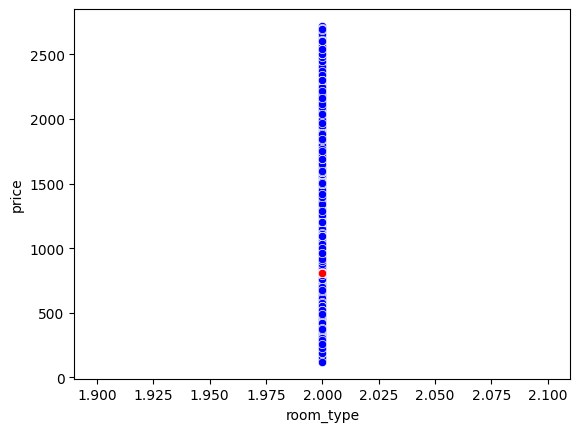

In [159]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='room_type', y='price', color="blue", data = f3)
sns.scatterplot(x='room_type', y='Pred_room', color="red", data = f3)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_response_rate', ylabel='price'>

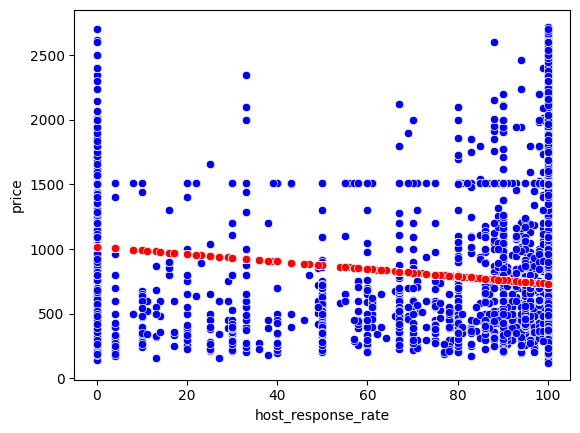

In [160]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_response_rate', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_response_rate', y='Pred_response', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_is_superhost', ylabel='price'>

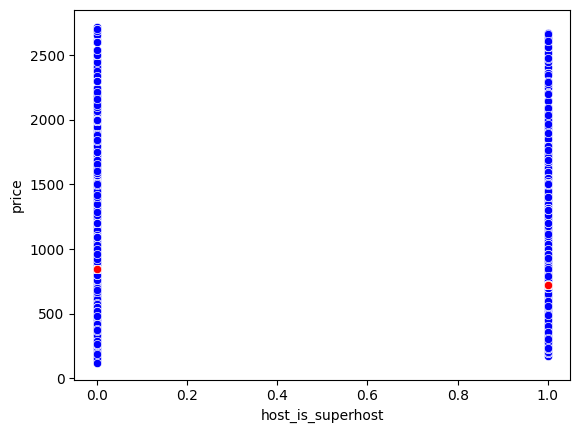

In [161]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_is_superhost', y='Pred_superhost', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

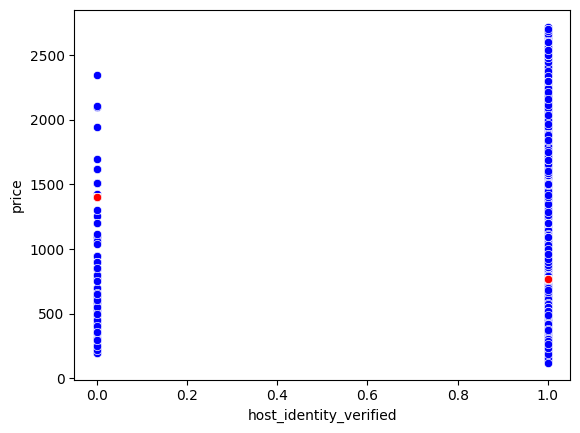

In [162]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='host_identity_verified', y='Pred_identity', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='instant_bookable', ylabel='price'>

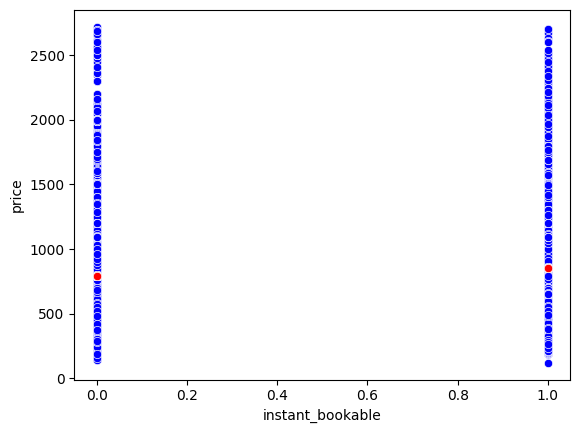

In [163]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='instant_bookable', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='instant_bookable', y='Pred_bookable', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='bathrooms', ylabel='accommodates'>

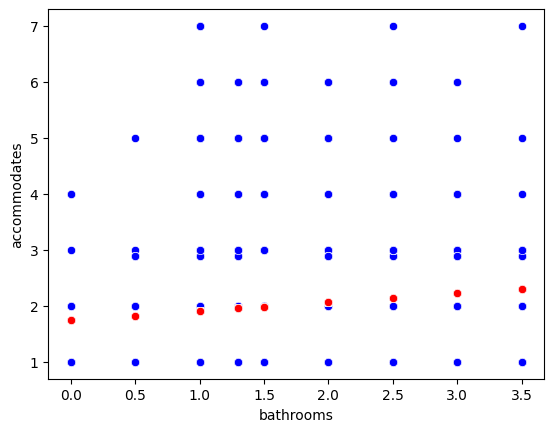

In [164]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data = f3_copy)
sns.scatterplot(x='bathrooms', y='Pred_bathrooms', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

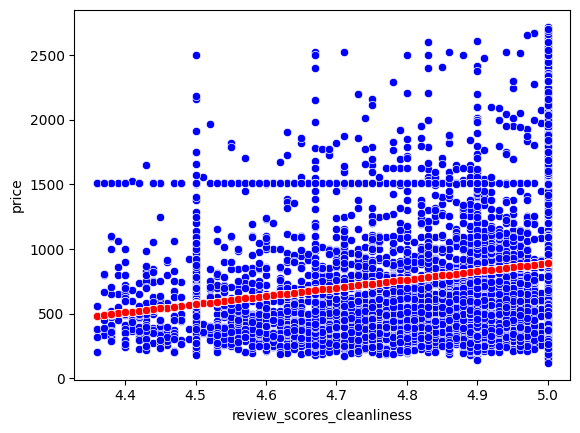

In [165]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='review_scores_cleanliness', y='Pred_cleanliness', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

<Axes: xlabel='property_type', ylabel='price'>

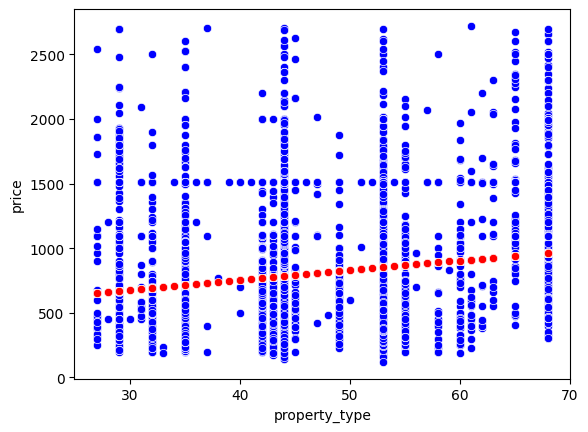

In [166]:
#Visualizamos la gráfica comprativa entre el total real y el total predecido
sns.scatterplot(x='property_type', y='price', color="blue", data = f3_copy)
sns.scatterplot(x='property_type', y='Pred_property', color="red", data = f3_copy)
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data = df)

In [167]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [168]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Vars_Indep2, y=Vars_Dep2)
coef_Deter2

0.06045154425215882

In [169]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Vars_Indep3, y=Vars_Dep3)
coef_Deter3

0.01307781073267611

In [170]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Vars_Indep4, y=Vars_Dep4)
coef_Deter4

0.10785742992723868

In [171]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Vars_Indep5, y=Vars_Dep5)
coef_Deter5

0.00401549094604936

In [172]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Vars_Indep6, y=Vars_Dep6)
coef_Deter6

0.005260903050239629

In [173]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Vars_Indep7, y=Vars_Dep7)
coef_Deter7

0.040584715154996065

In [174]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Vars_Indep8, y=Vars_Dep8)
coef_Deter8

0.01934539991907347

In [175]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [176]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.24586895747970872)

In [177]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.11435825607570321)

In [178]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.32841654941132103)

In [179]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.06336790154367872)

In [180]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.0725320829029446)

In [181]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.20145648451960058)

In [182]:
#Corroboramos cial es el coeficiente de Correlación de nuestro modelo
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.13908774180017974)

In [183]:
#Graficamos todas las despersiones entre todas las variables
#sns.pairplot(f2)

In [191]:
#Analizar categorias de una columna
df6 = f3.groupby(['bathrooms'])['bathrooms'].count()
df6

bathrooms
0.0      49
0.5      57
1.0    6920
1.3     194
1.5     781
2.0     449
2.5     117
3.0      96
3.5      30
Name: bathrooms, dtype: int64

In [1]:
f3.info()

NameError: name 'f3' is not defined

In [185]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=f3.corr()
Corr_Factors

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.370770,0.390928,-0.023221,NaN,0.259746,0.085262,0.072570,-0.245869,-0.234987
host_is_superhost,NaN,0.370770,1.000000,0.156201,-0.064265,NaN,0.038087,-0.003469,-0.007132,-0.114358,-0.034997
host_identity_verified,NaN,0.390928,0.156201,1.000000,-0.044328,NaN,0.165735,0.043617,0.068480,-0.328417,-0.138769
property_type,NaN,-0.023221,-0.064265,-0.044328,1.000000,NaN,0.035943,0.071528,-0.080370,0.139088,0.025390
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.259746,0.038087,0.165735,0.035943,NaN,1.000000,0.134485,0.013760,0.063368,-0.142607
accommodates,NaN,0.085262,-0.003469,0.043617,0.071528,NaN,0.134485,1.000000,0.072532,0.251809,-0.021409
bathrooms,NaN,0.072570,-0.007132,0.068480,-0.080370,NaN,0.013760,0.072532,1.000000,-0.140783,-0.048854
price,NaN,-0.245869,-0.114358,-0.328417,0.139088,NaN,0.063368,0.251809,-0.140783,1.000000,0.201456


In [186]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors_pred=f3_copy.corr()
Corr_Factors_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.025390,-0.080370,0.035943,0.044328,0.064265,0.023221,-0.023221,-0.064265,-0.044328,1.000000,NaN,0.035943,0.071528,-0.080370,0.139088,0.025390
Pred_cleanliness,0.025390,1.000000,-0.048854,-0.142607,0.138769,0.034997,0.234987,-0.234987,-0.034997,-0.138769,0.025390,NaN,-0.142607,-0.021409,-0.048854,0.201456,1.000000
Pred_bathrooms,-0.080370,-0.048854,1.000000,0.013760,-0.068480,0.007132,-0.072570,0.072570,-0.007132,0.068480,-0.080370,NaN,0.013760,0.072532,1.000000,-0.140783,-0.048854
Pred_bookable,0.035943,-0.142607,0.013760,1.000000,-0.165735,-0.038087,-0.259746,0.259746,0.038087,0.165735,0.035943,NaN,1.000000,0.134485,0.013760,0.063368,-0.142607
Pred_identity,0.044328,0.138769,-0.068480,-0.165735,1.000000,0.156201,0.390928,-0.390928,-0.156201,-1.000000,0.044328,NaN,-0.165735,-0.043617,-0.068480,0.328417,0.138769
Pred_superhost,0.064265,0.034997,0.007132,-0.038087,0.156201,1.000000,0.370770,-0.370770,-1.000000,-0.156201,0.064265,NaN,-0.038087,0.003469,0.007132,0.114358,0.034997
Pred_response,0.023221,0.234987,-0.072570,-0.259746,0.390928,0.370770,1.000000,-1.000000,-0.370770,-0.390928,0.023221,NaN,-0.259746,-0.085262,-0.072570,0.245869,0.234987
host_response_rate,-0.023221,-0.234987,0.072570,0.259746,-0.390928,-0.370770,-1.000000,1.000000,0.370770,0.390928,-0.023221,NaN,0.259746,0.085262,0.072570,-0.245869,-0.234987
host_is_superhost,-0.064265,-0.034997,-0.007132,0.038087,-0.156201,-1.000000,-0.370770,0.370770,1.000000,0.156201,-0.064265,NaN,0.038087,-0.003469,-0.007132,-0.114358,-0.034997
host_identity_verified,-0.044328,-0.138769,0.068480,0.165735,-1.000000,-0.156201,-0.390928,0.390928,0.156201,1.000000,-0.044328,NaN,0.165735,0.043617,0.068480,-0.328417,-0.138769


In [187]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Pred_room,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,NaN,1.000000,0.370770,0.390928,0.023221,NaN,0.259746,0.085262,0.072570,0.245869,0.234987
host_is_superhost,NaN,0.370770,1.000000,0.156201,0.064265,NaN,0.038087,0.003469,0.007132,0.114358,0.034997
host_identity_verified,NaN,0.390928,0.156201,1.000000,0.044328,NaN,0.165735,0.043617,0.068480,0.328417,0.138769
property_type,NaN,0.023221,0.064265,0.044328,1.000000,NaN,0.035943,0.071528,0.080370,0.139088,0.025390
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,NaN,0.259746,0.038087,0.165735,0.035943,NaN,1.000000,0.134485,0.013760,0.063368,0.142607
accommodates,NaN,0.085262,0.003469,0.043617,0.071528,NaN,0.134485,1.000000,0.072532,0.251809,0.021409
bathrooms,NaN,0.072570,0.007132,0.068480,0.080370,NaN,0.013760,0.072532,1.000000,0.140783,0.048854
price,NaN,0.245869,0.114358,0.328417,0.139088,NaN,0.063368,0.251809,0.140783,1.000000,0.201456


In [188]:
#Encontramos el valor de todas las correlaciones entre las variables
Corr_Factors1_pred=abs(Corr_Factors_pred)
Corr_Factors1_pred

,Pred_property,Pred_cleanliness,Pred_bathrooms,Pred_bookable,Pred_identity,Pred_superhost,Pred_response,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Pred_property,1.000000,0.025390,0.080370,0.035943,0.044328,0.064265,0.023221,0.023221,0.064265,0.044328,1.000000,NaN,0.035943,0.071528,0.080370,0.139088,0.025390
Pred_cleanliness,0.025390,1.000000,0.048854,0.142607,0.138769,0.034997,0.234987,0.234987,0.034997,0.138769,0.025390,NaN,0.142607,0.021409,0.048854,0.201456,1.000000
Pred_bathrooms,0.080370,0.048854,1.000000,0.013760,0.068480,0.007132,0.072570,0.072570,0.007132,0.068480,0.080370,NaN,0.013760,0.072532,1.000000,0.140783,0.048854
Pred_bookable,0.035943,0.142607,0.013760,1.000000,0.165735,0.038087,0.259746,0.259746,0.038087,0.165735,0.035943,NaN,1.000000,0.134485,0.013760,0.063368,0.142607
Pred_identity,0.044328,0.138769,0.068480,0.165735,1.000000,0.156201,0.390928,0.390928,0.156201,1.000000,0.044328,NaN,0.165735,0.043617,0.068480,0.328417,0.138769
Pred_superhost,0.064265,0.034997,0.007132,0.038087,0.156201,1.000000,0.370770,0.370770,1.000000,0.156201,0.064265,NaN,0.038087,0.003469,0.007132,0.114358,0.034997
Pred_response,0.023221,0.234987,0.072570,0.259746,0.390928,0.370770,1.000000,1.000000,0.370770,0.390928,0.023221,NaN,0.259746,0.085262,0.072570,0.245869,0.234987
host_response_rate,0.023221,0.234987,0.072570,0.259746,0.390928,0.370770,1.000000,1.000000,0.370770,0.390928,0.023221,NaN,0.259746,0.085262,0.072570,0.245869,0.234987
host_is_superhost,0.064265,0.034997,0.007132,0.038087,0.156201,1.000000,0.370770,0.370770,1.000000,0.156201,0.064265,NaN,0.038087,0.003469,0.007132,0.114358,0.034997
host_identity_verified,0.044328,0.138769,0.068480,0.165735,1.000000,0.156201,0.390928,0.390928,0.156201,1.000000,0.044328,NaN,0.165735,0.043617,0.068480,0.328417,0.138769


<Axes: >

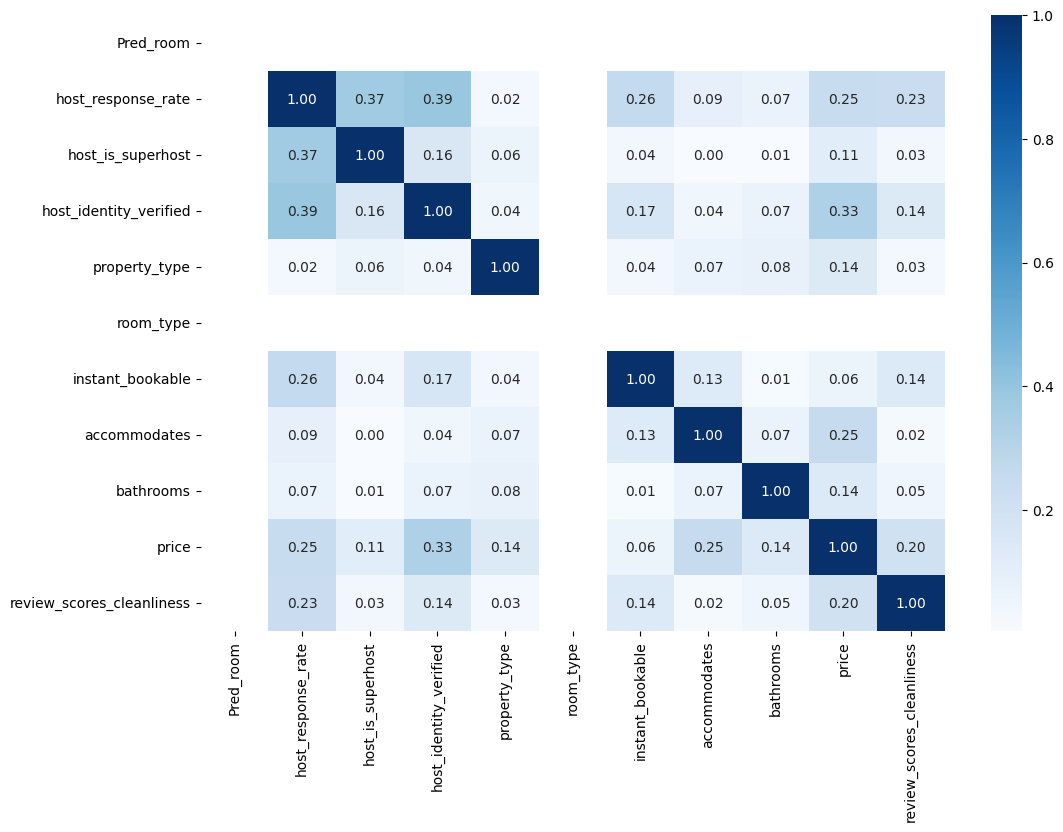

In [189]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap

<Axes: >

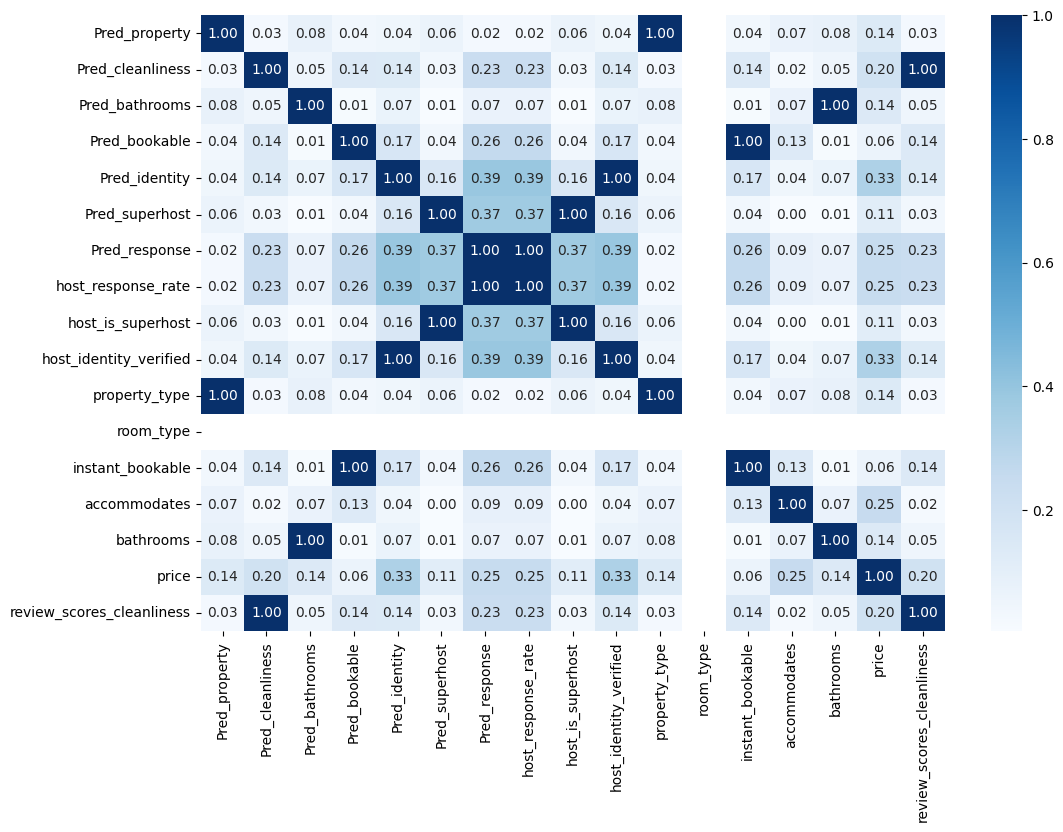

In [190]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1_pred, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap